Importing packages:

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

Importing the dataframes and combining them:

In [2]:
from pathlib import Path

# creating empty dataframe:
data = pd.DataFrame()
# accessing all csv files in 'data' directory:
files = Path('C:/Users/danie/OneDrive/Desktop/HUPLACLIP/data_analysis/data').glob('*.csv')
for file in files:
    # reading single csv file as dataframe
    df = pd.read_csv(file,index_col = 0)
    # adding single dataframe to general dataframe:
    data = pd.concat([data,df])

# checking dimension of data and printing the names of the variables:
print(data.shape)
print(data.columns.tolist)

(367, 11)
<bound method IndexOpsMixin.tolist of Index(['rt', 'trial_type', 'trial_index', 'time_elapsed', 'internal_node_id',
       'response', 'nodesOrdering', 'cliqueSize', 'correctResponse',
       'presentationNumber', 'correctnessOfResponse'],
      dtype='object')>


Removing useless observations and variables:

In [3]:
# removing instruction trials:
data = data[data["trial_type"] != "instructions"]
print(data.shape)

# removing irrelevant variables:
data.drop(["internal_node_id", "trial_index", "trial_type"], axis=1, inplace=True)
print(data.shape)

(357, 11)
(357, 8)


Exploring the data:

In [20]:
data.head()

,rt,time_elapsed,response,nodesOrdering,cliqueSize,correctResponse,presentationNumber,correctnessOfResponse
view_history,,,,,,,,
NaN,4152,7251,,"[146,24,286,154,213,118,215,1,68,178,2,93,237,...",100.0,arrowright,0.0,NaN
NaN,282,9234,,"[225,80,177,111,1,159,59,275,108,281,7,248,36,...",100.0,arrowright,0.0,NaN
NaN,358,11283,arrowright,"[258,110,119,295,13,144,293,188,29,274,271,31,...",100.0,arrowright,0.0,True
NaN,493,13443,,"[179,263,228,190,212,106,88,257,26,213,95,186,...",95.0,arrowleft,1.0,NaN
NaN,450,15570,arrowleft,"[215,270,22,12,137,228,209,59,55,62,97,140,216...",95.0,arrowleft,1.0,True


- exploring reaction times distribution and filtering the data

False    351
True       6
Name: rt, dtype: int64


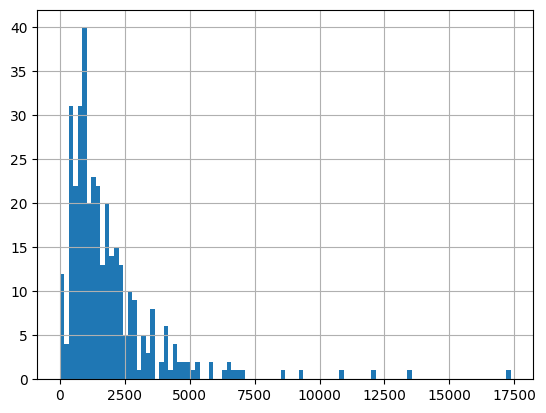

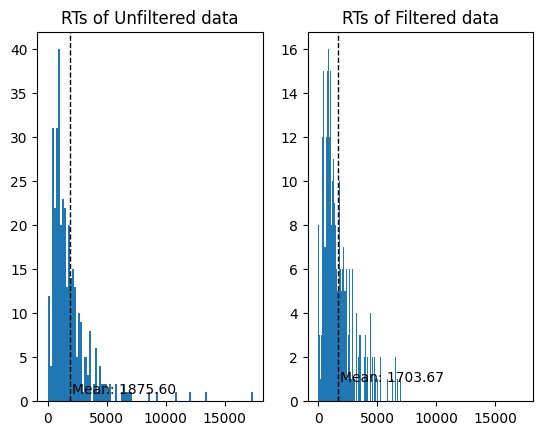

In [14]:
# histogram of reaction times:
data.rt.hist(bins=100)
# counting trials that were too slow and removing them (exclusion criterion: rt>7500)
print((data.rt>=7500).value_counts())
data_filtered = data.query('rt < 7500')

#plotting unfiltered and filtered data:
fig, (ax1,ax2) = plt.subplots(1, 2,sharex=True)
min_ylim, max_ylim = plt.ylim()
#unfiltered data
ax1.hist(data.rt,bins=100)
ax1.axvline(data.rt.mean(), color='k', linestyle='dashed', linewidth=1)
ax1.text(data.rt.mean()*1.1,max_ylim*0.9, 'Mean: {:.2f}'.format(data.rt.mean()))
ax1.set_title("RTs of Unfiltered data")
#filtered data
ax2.hist(data_filtered.rt,bins=100)
ax2.axvline(data_filtered.rt.mean(), color='k', linestyle='dashed', linewidth=1)
ax2.text(data_filtered.rt.mean()*1.1,max_ylim*0.9, 'Mean: {:.2f}'.format(data_filtered.rt.mean()))
ax2.set_title("RTs of Filtered data")
plt.show()

- grouping trials of same clique size and calculating:
    - accuracy as a function of clique size
    - number of moves as a function of clique size
    - reaction time as function of clique size (all trials, both space presses and arrow presses, maybe indicating more processing)

In [24]:
data.head()

# REMOVE "view_history"!!

# ACCURACY:
# 1) calculating overall accuracy ( sum(correctnessOfResponse == True) / sum(!isnan(correctnessOfResponse)) )
# 2) calculating accuracy for the existing levels of "cliqueSize" variable
# 3) plotting accuracy (y axis) as a function of cliqueSize (x axis)

# REACTION TIMES
# 1) calculating mean(reaction time) for all trials
# 2) calculating mean(reaction time) for the existing levels of "cliqueSize" variable
# 3) plotting reaction time (y axis) as a function of cliqueSize (x axis)

TypeError: 'method' object is not subscriptable